## Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load data

## Exploring the Data

In [2]:
df = pd.read_csv('adult_data.csv')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [7]:
columns = df.columns

In [8]:
 for column in columns:
        print(column)
        print(df[column].value_counts())
    

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          

In [9]:
df.nunique()
        

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## Replacing '?' Value

In [11]:
#replace the values with NaN
df['workclass'] = df.workclass.str.replace('?', 'NaN')
df['occupation'] = df.occupation.str.replace('?', 'NaN')

In [12]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 NaN                  1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [13]:
df["native-country"] = df["native-country"].str.replace('?', 'NaN')

In [14]:
# income
df["income"] = df["income"].str.replace("<=50K", '0')
df["income"] = df["income"].str.replace(">50K", '1')

In [15]:
df['income'].value_counts()

 0    24720
 1     7841
Name: income, dtype: int64

## Income data Analysis

In [16]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


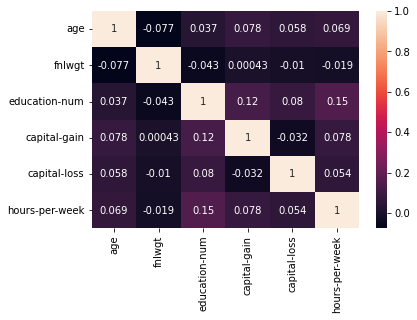

In [17]:
sns.heatmap(df.corr(), annot=True);

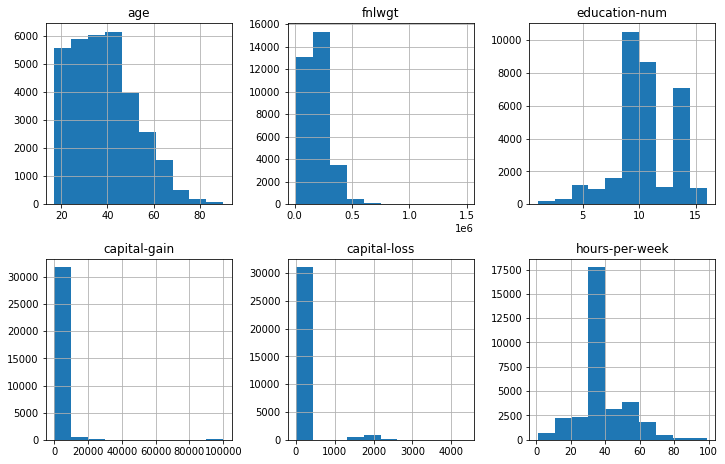

In [18]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

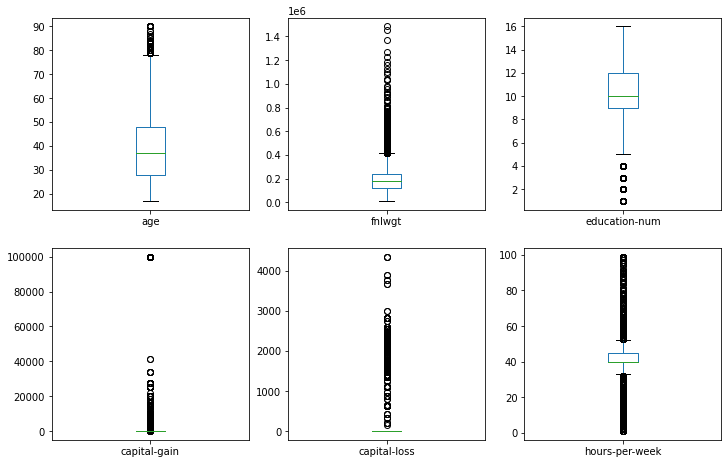

In [19]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

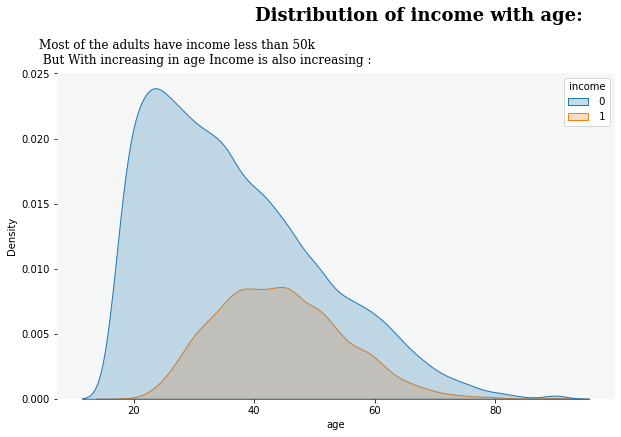

In [20]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(x=df["age"],hue=df["income"],fill=True)
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.4,1,"Distribution of income with age:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"Most of the adults have income less than 50k \n But With increasing in age Income is also increasing :",**{'font':'serif', 'size':12,}, alpha = 1)


fig.show()

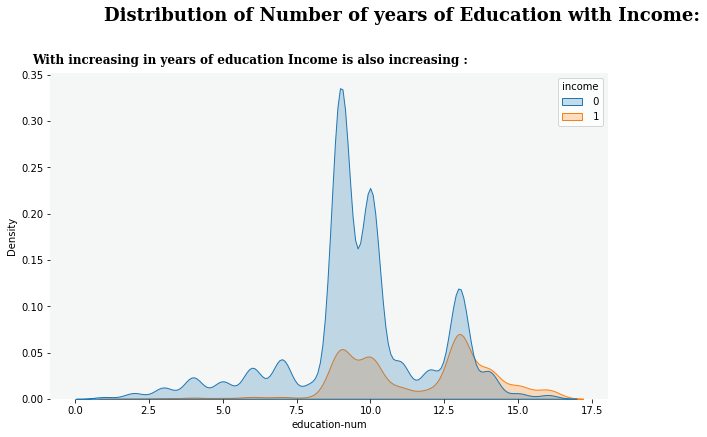

In [21]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(x=df["education-num"],hue=df["income"],fill=True,)
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.2,1,"Distribution of Number of years of Education with Income:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"With increasing in years of education Income is also increasing :",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)


fig.show()

## Feature Engineering

In [22]:
#convert categorical data for country & education with Label Encoder
lbl_encode = LabelEncoder()
df['occupation_group'] = lbl_encode.fit_transform(df['occupation'])
df['country_group'] = lbl_encode.fit_transform(df['native-country'])


In [23]:
pd.concat([df['native-country'],df['country_group']]).unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' NaN', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands', 39, 4, 22, 18, 26,
       25, 35, 33, 15, 8, 1, 10, 19, 30, 21, 31, 3, 0, 37, 6, 24, 36, 13,
       32, 5, 7, 9, 12, 2, 23, 41, 29, 28, 34, 38, 11, 27, 40, 16, 20, 17,
       14], dtype=object)

In [24]:
pd.concat([df['occupation'],df['occupation_group']]).unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' NaN', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', 0, 3, 5, 10, 8, 12, 2, 14, 4, 6, 13, 7, 11, 1,
       9], dtype=object)

In [25]:
df_new = df[['age','fnlwgt','education-num','occupation_group','hours-per-week','country_group','income']].copy()

## Outlier Detection and treatment

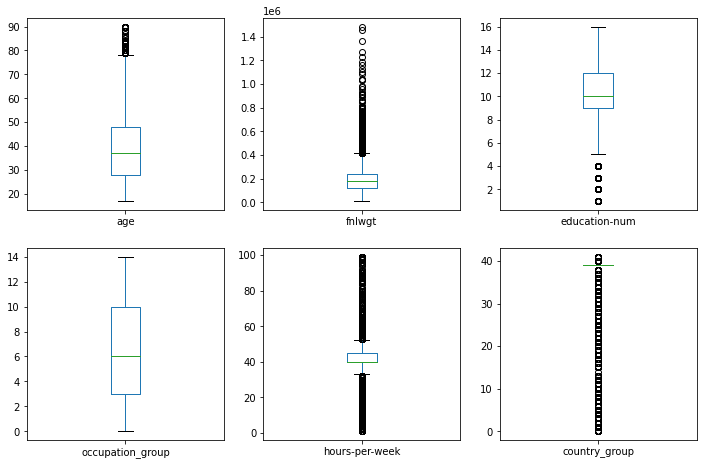

In [26]:
df_new.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

In [27]:
def outlier_treatment(datacolumn):
     sorted(datacolumn)
     Q1,Q3 = np.percentile(datacolumn , [25,75])
     IQR = Q3-Q1
     lower_range = Q1 - (1.5 * IQR)
     upper_range = Q3 + (1.5 * IQR)
     return lower_range,upper_range

In [28]:
#country_group outlier treatment since US has maximum value count we replace all with 39(us country lable)
outlier_treatment(df_new['country_group'])
lowerbound,upperbound = outlier_treatment(df['country_group'])
df_new['country_group']=np.where((df_new['country_group'] > upperbound) | (df_new['country_group'] < upperbound),39,df_new['country_group'])

In [29]:
#age outlier treatment
outlier_treatment(df_new['age'])
lowerbound,upperbound = outlier_treatment(df['age'])
mode_age=df_new['age'].mode()
df_new['age']=np.where((df_new['age'] > upperbound),mode_age,df['age'])

In [30]:
#hours-per-week outlier treatment
lowerbound,upperbound = outlier_treatment(df_new['hours-per-week'])
p,r = np.percentile(df_new['hours-per-week'] , [1,95])
df_new['hours-per-week']=np.where((df_new['hours-per-week'] < lowerbound),p,df_new['hours-per-week'])
df_new['hours-per-week']=np.where((df_new['hours-per-week'] > upperbound),r,df_new['hours-per-week'])

In [31]:
#fnlwgt outlier treatment
lowerbound,upperbound = outlier_treatment(df_new['fnlwgt'])
mean_fnlwgt=df_new['fnlwgt'].mean()
df_new['fnlwgt']=np.where((df_new['fnlwgt'] < lowerbound),p,df_new['fnlwgt'])
df_new['fnlwgt']=np.where((df_new['fnlwgt'] > upperbound) | (df_new['fnlwgt'] < lowerbound),mean_fnlwgt,df_new['fnlwgt'])

In [32]:
#education-num outlier treatment
lowerbound,upperbound = outlier_treatment(df_new['education-num'])
mode_education=df_new['education-num'].mode()
df_new['education-num']=np.where((df_new['education-num'] < lowerbound),mode_education,df_new['education-num'])


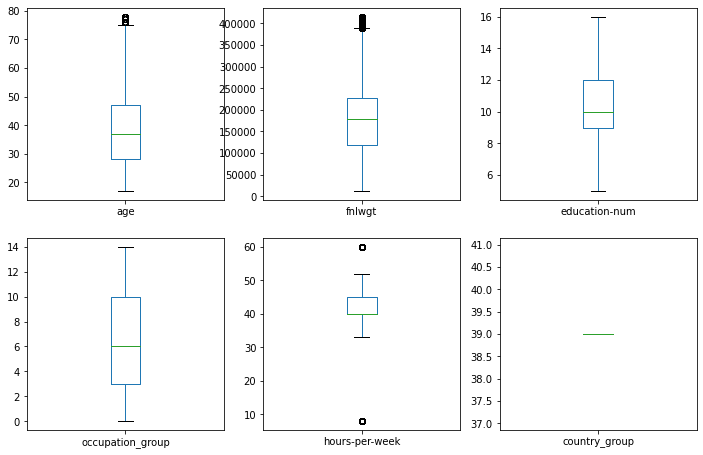

In [33]:
df_new.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

## Algorithm for Clustering (K-means)

## Check whether data is good for clustering - Hopkins score

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(df_new)

0.7890725110257583

## Finding optimal number of clusters

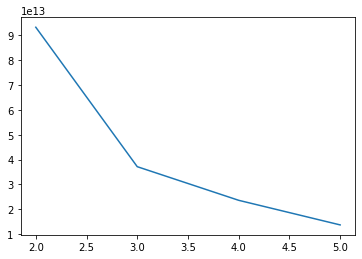

In [36]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4,5]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_new)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters, ssd)
plt.show()

In [ ]:
# silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_new)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_new, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5379023135759969
For n_clusters=3, the silhouette score is 0.5865882977690806


## final model with k=3

In [ ]:
model = KMeans(n_clusters=3, max_iter=50)
y=model.fit_predict(df_new)

In [ ]:
model.labels_

In [ ]:
print(model.cluster_centers_)

In [ ]:
df_new["cluster_id"] = model.labels_

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(df_new["cluster_id"], df_new["education-num"],df_new["income"])
plt.title("education-num\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df_new["cluster_id"], df_new["hours-per-week"], df_new["income"])
plt.title("hours-per-week\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df_new["cluster_id"], df_new["age"],df_new["income"])
plt.title("age\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df_new["cluster_id"], df_new["occupation_group"],df_new["income"])
plt.title("occupation_group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df_new["cluster_id"], df_new["fnlwgt"],df_new["income"])
plt.title("fnlwgt\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

## Classification

In [ ]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

In [ ]:
ss= StandardScaler().fit(df1.drop('income', axis=1))

In [ ]:
X= ss.transform(df1.drop('income', axis=1))
y= df['income']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Accuracy on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(lr.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Accuracy on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test, prediction1))
print(classification_report(y_test, prediction1))